In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [4]:
df = pd.read_csv('FuelConsumptionCo2.csv')
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(6)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230


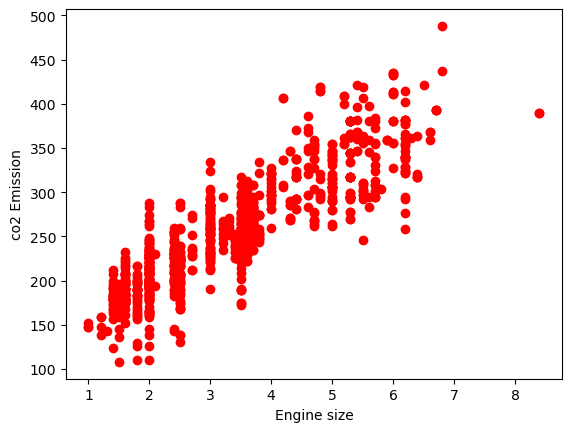

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel('Engine size')
plt.ylabel('co2 Emission')
plt.show

In [75]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [79]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         50.79647283 -1.53003382]]
Intercept:  [106.39546942]


<function matplotlib.pyplot.show(close=None, block=None)>

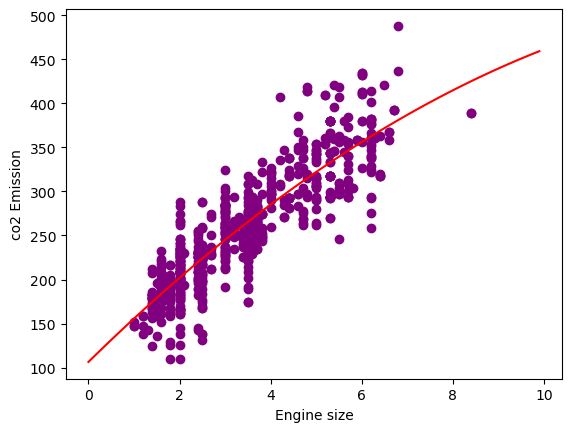

In [81]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= 'purple')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine size')
plt.ylabel('co2 Emission')
plt.show

In [83]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 23.99
Residual sum of squares (MSE): 937.35
R2-score: 0.74
